In [68]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [69]:
from skimage import exposure, io
from skimage.util import view_as_blocks

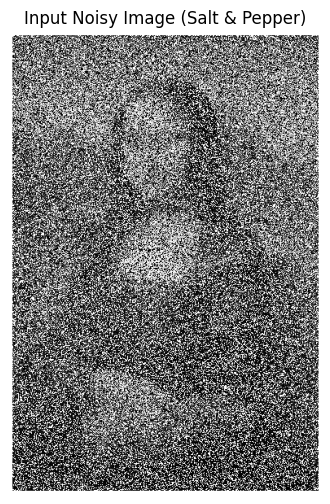

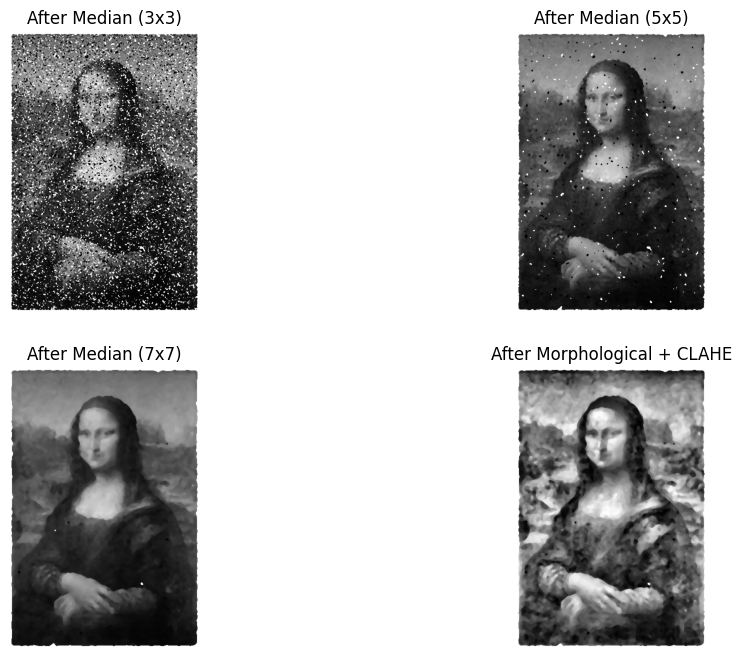

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/content/monalisa.png", cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Input Noisy Image (Salt & Pepper)")
plt.axis('off')
plt.show()


median1 = cv2.medianBlur(img, 3)
median2 = cv2.medianBlur(median1, 5)
median3 = cv2.medianBlur(median2, 7)


kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(median3, cv2.MORPH_OPEN, kernel)


clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8))
final_img = clahe.apply(morph)


titles = ["After Median (3x3)", "After Median (5x5)", "After Median (7x7)", "After Morphological + CLAHE"]
images = [median1, median2, median3, final_img]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


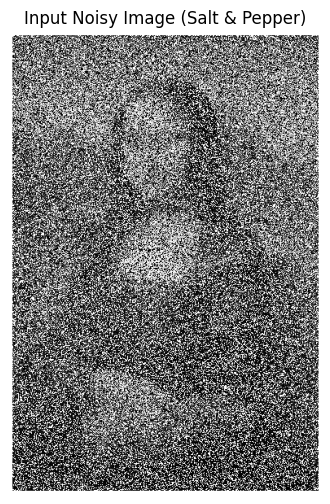

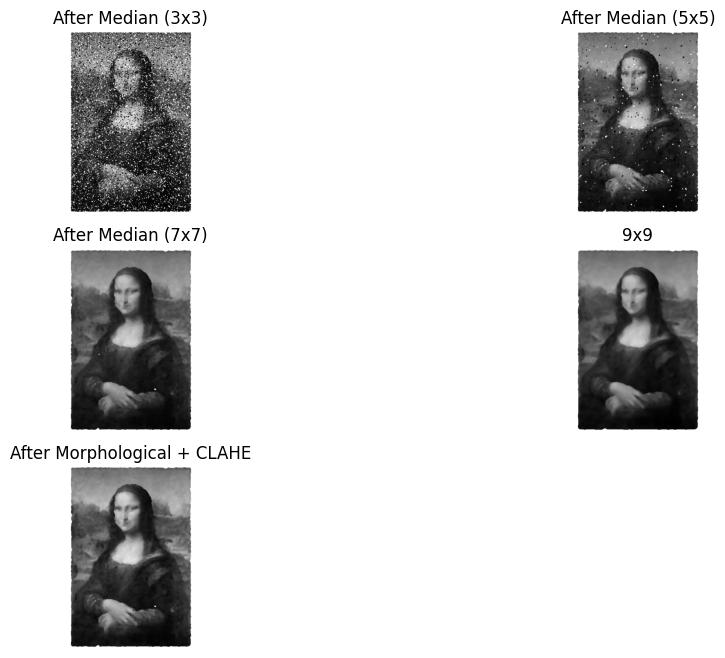

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/content/monalisa.png", cv2.IMREAD_GRAYSCALE)

# نمایش تصویر نویزی
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Input Noisy Image (Salt & Pepper)")
plt.axis('off')
plt.show()


median1 = cv2.medianBlur(img, 3)
median2 = cv2.medianBlur(median1, 5)
median3 = cv2.medianBlur(median2, 7)
median4 = cv2.medianBlur(median3, 9)

kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(median3, cv2.MORPH_OPEN, kernel)


clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(3,3))
final_img = clahe.apply(morph)


titles = ["After Median (3x3)", "After Median (5x5)", "After Median (7x7)", "9x9" ,"After Morphological + CLAHE"]
images = [median1, median2, median3,median4 ,final_img]

plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


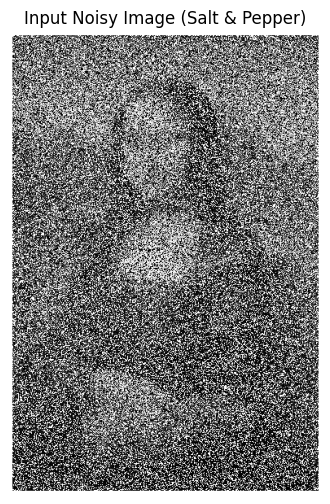

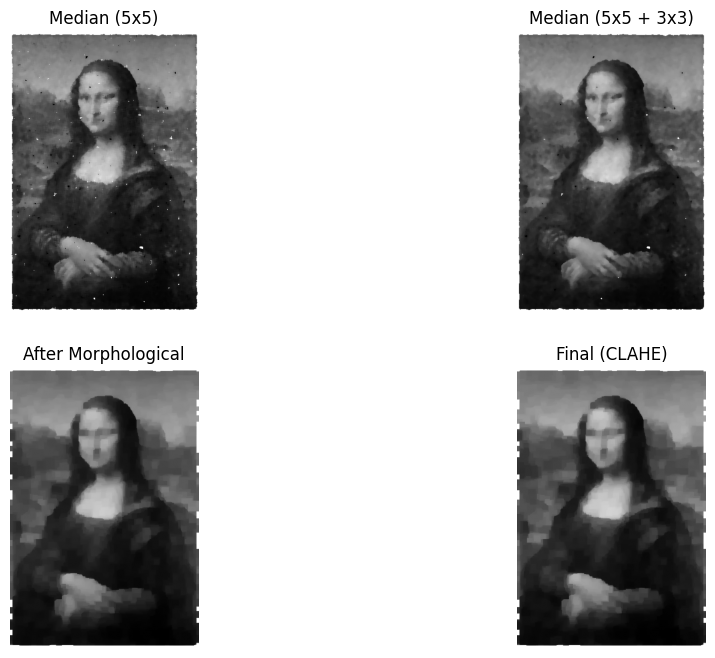

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/content/monalisa.png", cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Input Noisy Image (Salt & Pepper)")
plt.axis('off')
plt.show()



median5 = cv2.medianBlur(img, 7)

median3 = cv2.medianBlur(median5, 3)


kernel = np.ones((9,9), np.uint8)

opened = cv2.morphologyEx(median5, cv2.MORPH_OPEN, kernel)

morph = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)


clahe = cv2.createCLAHE(clipLimit=0.2, tileGridSize=(3,3))
final_img = clahe.apply(morph)


titles = ["Median (5x5)", "Median (5x5 + 3x3)", "After Morphological", "Final (CLAHE)"]
images = [median5, median3, morph, final_img]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


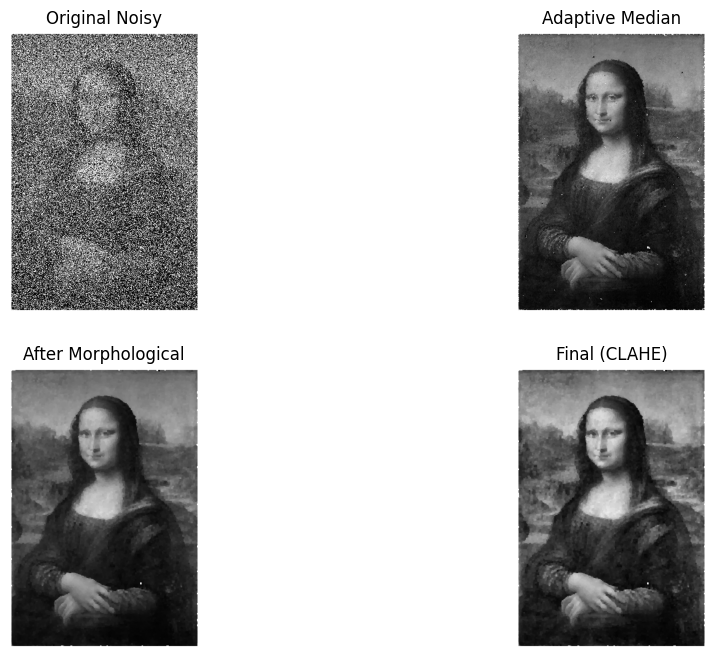

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/content/monalisa.png", cv2.IMREAD_GRAYSCALE)


def adaptive_median(img, max_ksize=7):
    filtered = img.copy()
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            k = 3
            while k <= max_ksize:
                r = k // 2
                x1, x2 = max(0, i-r), min(h, i+r+1)
                y1, y2 = max(0, j-r), min(w, j+r+1)
                window = img[x1:x2, y1:y2].flatten()
                Zmin, Zmax, Zmed = np.min(window), np.max(window), np.median(window)
                if Zmin < Zmed < Zmax:
                    if Zmin < img[i,j] < Zmax:
                        filtered[i,j] = img[i,j]
                    else:
                        filtered[i,j] = Zmed
                    break
                k += 2
    return filtered.astype(np.uint8)

adaptive_filtered = adaptive_median(img, max_ksize=7)

# ---------- morph ----------
kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(adaptive_filtered, cv2.MORPH_OPEN, kernel)
morph = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# ----------  CLAHE baraye conterast ----------
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
final_img = clahe.apply(morph)


titles = ["Original Noisy", "Adaptive Median", "After Morphological", "Final (CLAHE)"]
images = [img, adaptive_filtered, morph, final_img]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()
